# Rectangular- and Gaussian Low Pass Filtering 

* Author: Johannes Maucher
* Last Update: 28th January 2021

In section [Basic Filter Operations](02filtering.ipynb) and section [Gaussian Filters](04gaussianDerivatives.ipynb) the average- and the Gaussian filter have been described, respectively. Both of them blur their input by calculating at each position $i$ a weighted sum of the values $f(i+u)$ in the neighbouring positions. 

\begin{equation}
g(i) = \sum\limits_{u=-k}^{u=k} h(u) f(i+u) 
\end{equation}

The difference is that for the the average filters the weights $h(u)$ are all the same, whereas in the Gaussian filter the weights $h(u)$ decrease for increasing absolute values of $u$. 

Both filters reduce variations in neighbouring values by replacing original values by neighbourhood-averages. Filters with this property are called **Low-Pass Filters (LP)**. In order to understand this term, the term of *frequency in the context of images* must be explained: **In image-processing the term of frequency refers to pixel-value variations within a neighbourhood**. If their are strong variations within neighbouring pixel-values we speak of high-frequencies, whereas in homogenous regions with nearly no variations the frequency is low. A Low-Pass filter suppresses high-frequencies, whereas low-frequencies are left unchanged. Correspondingly, a **High-Pass Filter (HP)** suppresses low-frequencies but leaves high-frequencies unchanged. Both, Low- and High-Pass Filters have a wide range of applications in image-processing, for example noise-reduction (LP) and contour-extraction (HP). Noise reduction is subject of the [next section](06GaussianNoiseReduction.ipynb). 

In the current section we will demonstrate and compare the properties of the average- and Gauss-Filter. For this demonstration we apply 1-dimensional signals and filters. The adaptation to the 2-dimensional case should be obvious.     

We will apply both filters to a signal, which is the sum of three sinusoidal signals of different frequencies

$$
y(t)=sin(2\pi \cdot 15 \cdot t) + sin(2\pi \cdot 30 \cdot t) + sin(2\pi \cdot 45 \cdot t)
$$

Again, the [scipy ndimage package](http://docs.scipy.org/doc/scipy-0.13.0/reference/ndimage.html) is applied for convolution filtering.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sci
import scipy.ndimage as ndi

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Function for calculating and plotting the spectral representation of a signal
The function below calculates the single-sided amplitude spectrum of a 1-dimensional time domain signal $y$. The sampling frequency $Fs$ is required for a correct scaling of the frequency-axis in the plot.

In [3]:
def plotSpectrum(y,Fs,title="",FX=None,FY=None):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = np.arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(int(n/2))] # one side frequency range

 Y = sci.fft(y)/n # fft computing and normalization
 Y = Y[range(int(n/2))]
 if (FX and FY)!=None:
     plt.figure(figsize=(FX,FY))
 plt.stem(frq,abs(Y),'r') # plotting the spectrum
 plt.title(title)
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|Y(freq)|')

## Define signal that shall be filtered

The input signal

$$
y(t)=sin(2\pi \cdot 15 \cdot t) + sin(2\pi \cdot 30 \cdot t) + sin(2\pi \cdot 45 \cdot t)
$$

is generated and visualized in the following code-cells:

In [4]:
Fs = 200.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector for signal
ff = 15;   # lowest frequency in the signal
y = np.sin(2*np.pi*(ff)*t)+np.sin(2*np.pi*(2*ff)*t)+np.sin(2*np.pi*(3*ff)*t)
sigTitle="Accumulation of 3 sinusoidal signals"

Text(0.5, 1.0, 'Accumulation of 3 sinusoidal signals')

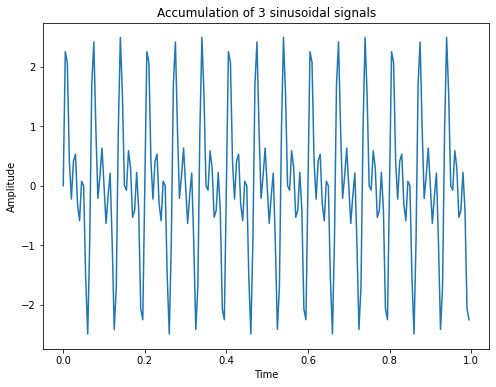

In [5]:
FIGX=8
FIGY=6
plt.figure(figsize=(FIGX,FIGY))
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(sigTitle)

The spectrum of this signal is plotted below. As can be seen, it contains non-zero values only at the frequencies $f=15 Hz$, $f=30 Hz$ and $f=45 Hz$:  

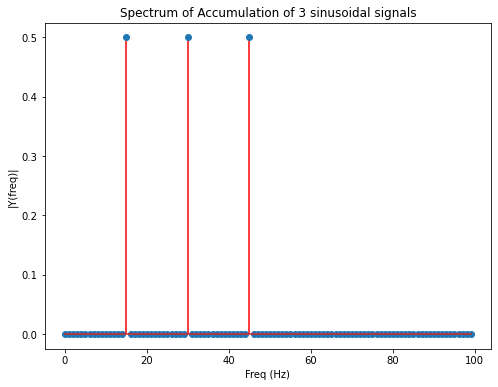

In [6]:
plotSpectrum(y,Fs,title="Spectrum of "+sigTitle,FX=FIGX,FY=FIGY)

## Rectangular (Average) Low Pass Filtering

Below an average filter of with $L=0.1s$ is defined:

In [7]:
L1=0.1 #filter length
tf=np.arange(-0.5,0.5,Ts) # time vector for filter
filt1=np.zeros(len(tf))
filt1[int((0.5-L1/2)*len(tf)):int((0.5+L1/2)*len(tf))]=1.0
filt1Title="Rectangular Filter of length L=" + str(L1)

We also define an average filter of length $L=0.2s$:

In [8]:
L2=0.2 #filter length
filt2=np.zeros(len(tf))
filt2[int((0.5-L2/2)*len(tf)):int((0.5+L2/2)*len(tf))]=1.0
filt2Title="Rectangular Filter of length L=" + str(L2)

Next both average filters are plotted in time domain (first row) and frequency domain (second row). As can be seen: **The higher the width of the filter in time domain, the smaller the bandwith of the filter in frequency domain** (i.e. the range of low-frequencies which are able to pass the filter).

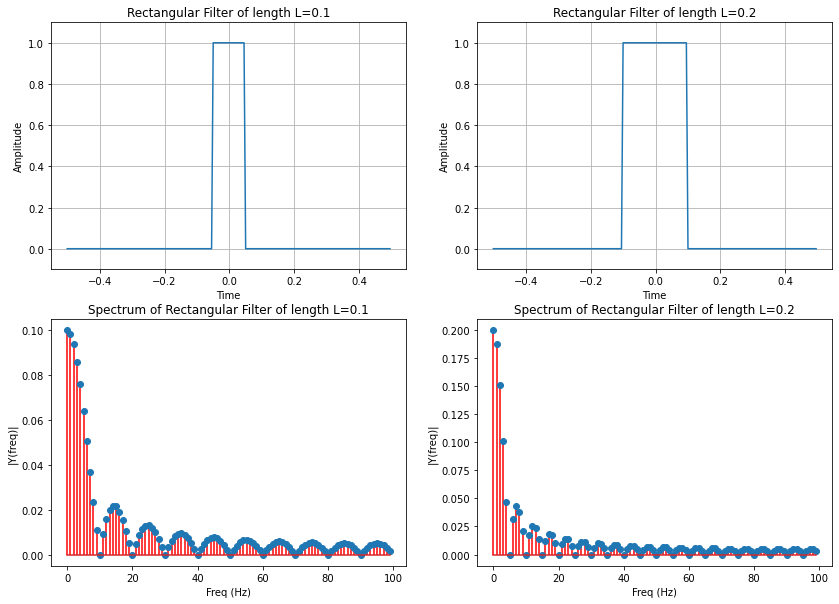

In [9]:
plt.figure(figsize=(14,10))
#plt.figure(figsize=(FIGX,FIGY))
plt.subplot(2,2,1)
plt.plot(tf,filt1)
plt.grid(True)
plt.title(filt1Title)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,2,2)
plt.plot(tf,filt2)
plt.grid(True)
plt.title(filt2Title)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,2,3)
plotSpectrum(filt1,Fs,title="Spectrum of "+filt1Title)

plt.subplot(2,2,4)
plotSpectrum(filt2,Fs,title="Spectrum of "+filt2Title)

As can be seen in the plot above, the spectrum of the filter is not monotonously decreasing with increasing frequency. For the filter of width $L=0.1s$, a frequency of $f=0$ is not suppressed. In the range from 0 to 10 Hz, the suppression increases and a frequency of $f=10Hz$ is totally blocked. However, from 10 to 15 Hz the suppression decreases and $f=20 Hz, f=30 Hz, ...$ are again totally blocked. 

### Apply rectangular filter to input signal

Next we convolve the average-filter of length $L=0.1s$ with the input signal:

In [10]:
fo1=ndi.convolve1d(y,filt1, output=np.float64,mode="wrap")

The filtered signal and it's spectrum is visualized below:

Text(0.5, 1.0, 'Filtered Signal')

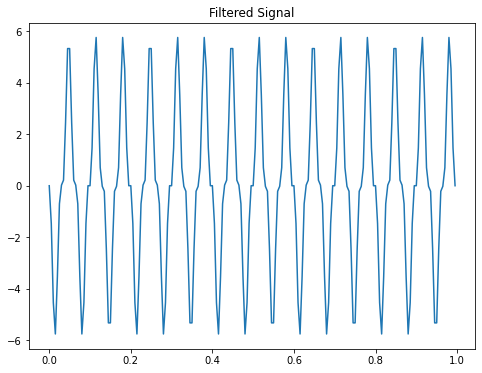

In [11]:
plt.figure(figsize=(FIGX,FIGY))
plt.plot(t,fo1)
plt.title("Filtered Signal")

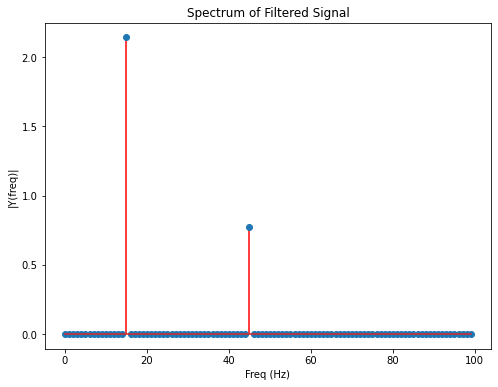

In [12]:
plotSpectrum(fo1,Fs,title="Spectrum of Filtered Signal",FX=FIGX,FY=FIGY)

As can be seen in the plots above, the average filter blocked the frequency of $f=30 Hz$ totally. The signal part with $f=15 Hz$ is suppressed less than the signal part with $f=45 Hz$.

### Plot signal, filter and filtered signal in time- and frequency domain

Below we just summarize the visualisations of the input-signal, filter and output-signal, both in time- and frequency-domain:

Text(0.5, 1.0, 'Filtered Signal')

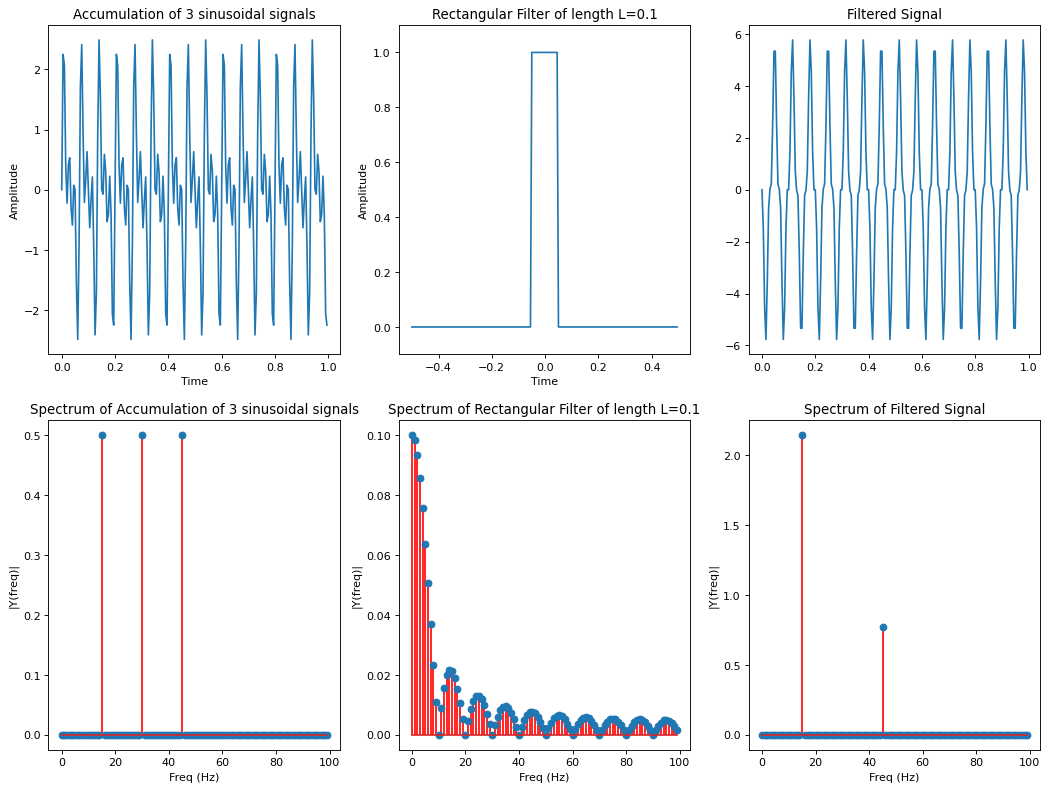

In [13]:
plt.figure(num=None, figsize=(16,12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,3,1)
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(sigTitle)
plt.subplot(2,3,2)
plt.plot(tf,filt1)
plt.title(filt1Title)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,3,4)
plotSpectrum(y,Fs,title="Spectrum of "+sigTitle)
plt.subplot(2,3,5)
plotSpectrum(filt1,Fs,title="Spectrum of "+filt1Title)
plt.subplot(2,3,6)
fo1=ndi.convolve1d(y,filt1, output=np.float64,mode="wrap")
plotSpectrum(fo1,Fs,title="Spectrum of Filtered Signal")
plt.subplot(2,3,3)
plt.plot(t,fo1)
plt.title("Filtered Signal")

## Gaussian Filter

The same process as above is now repeated for the Gaussian Filter. In contrast to the average-filter, the spectrum of the Gaussian filter decreases monotonously with increasing frequency. This is actually what we expect from a **Low-Pass:** The signal suppression increases with increasing frequency.

In [14]:
sig=0.01
m=0.0
filt=np.exp(-((tf-m)/sig)**2/2)/(sig*np.sqrt(2*np.pi))
filtTitle="Gaussian Filter"

### Plot signal, filter and filtered signal in time- and frequency domain

Text(0.5, 1.0, 'Filtered Signal')

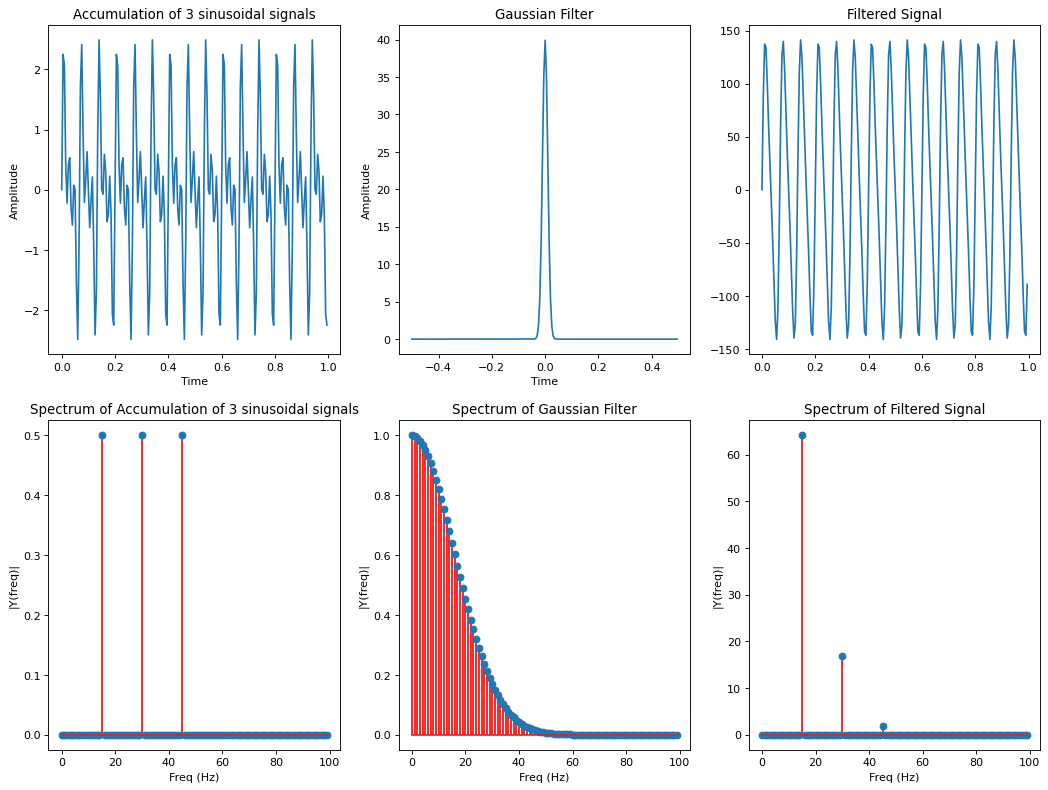

In [15]:
plt.figure(num=None, figsize=(16,12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,3,1)
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(sigTitle)
plt.subplot(2,3,2)
plt.plot(tf,filt)
plt.title(filtTitle)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,3,4)
plotSpectrum(y,Fs,title="Spectrum of "+sigTitle)
plt.subplot(2,3,5)
plotSpectrum(filt,Fs,title="Spectrum of "+filtTitle)
plt.subplot(2,3,6)
fo1=ndi.convolve1d(y,filt, output=np.float64,mode="wrap")
plotSpectrum(fo1,Fs,title="Spectrum of Filtered Signal")
plt.subplot(2,3,3)
plt.plot(t,fo1)
plt.title("Filtered Signal")

In the case of the average-filter, it has been shown above, that by increasing the filter-length $L$ in time-domain, the bandwidth of the filter can be decreased and vice versa. In the case of the Gaussian filter the bandwidth can be controlled by the standard-devaiation $\sigma$. Increasing $\sigma$ yields an increased width of the filter in time-domain, but a decreased bandwidth in frequency domain. This is demonstrated below, by visualizing a Gaussian filter with $\sigma=0.01$ and one with $\sigma=0.02$: 

In [16]:
sig1=0.01
m=0.0
filt1=np.exp(-((tf-m)/sig1)**2/2)/(sig1*np.sqrt(2*np.pi))
filt1Title="Gaussian Filter $\sigma$ = "+str(sig1)

sig2=0.02
m=0.0
filt2=np.exp(-((tf-m)/sig2)**2/2)/(sig2*np.sqrt(2*np.pi))
filt2Title="Gaussian Filter $\sigma$ = "+str(sig2)

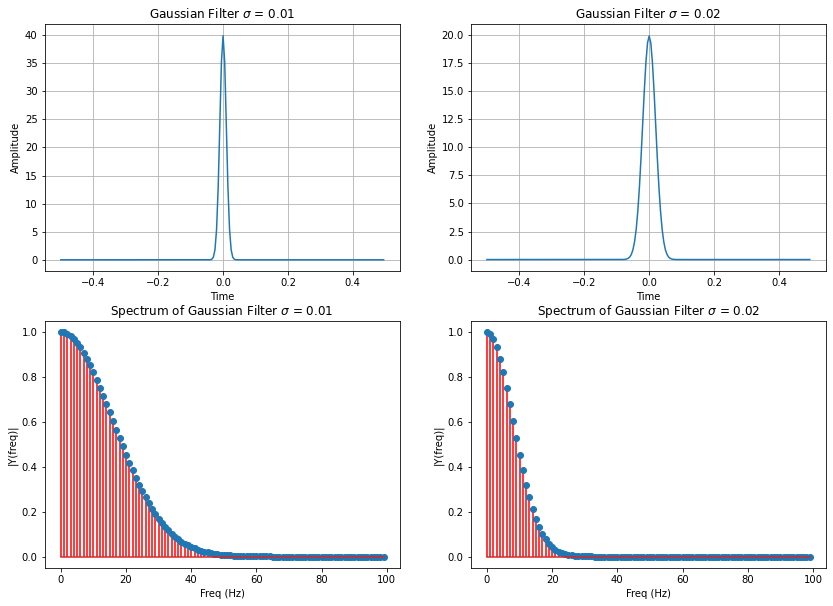

In [17]:
plt.figure(figsize=(14,10))
#plt.figure(figsize=(FIGX,FIGY))
plt.subplot(2,2,1)
plt.plot(tf,filt1)
plt.grid(True)
plt.title(filt1Title)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,2,2)
plt.plot(tf,filt2)
plt.grid(True)
plt.title(filt2Title)
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(2,2,3)
plotSpectrum(filt1,Fs,title="Spectrum of "+filt1Title)

plt.subplot(2,2,4)
plotSpectrum(filt2,Fs,title="Spectrum of "+filt2Title)

## Spectrum of 2-dimensional Average- and Gaussian Filter

The different behaviour of average- and Gaussian-filter, as demonstrated above for 1-dimensional signals, is the same for 2-dimensional data like images. This is shown in the figure below. The leftmost input-image contains low frequencies at the center, with increasing radial distance from the center, the frequency increases. The center image shows the result from filtering the input image with an 2-dimensional average-filter. As can be seen the suppression does not monotonously increase with increasing frequency: some lower frequencies are suppressed stronger than higher frequencies. In the image on the right hand side, the output of a Gaussian filter is shown. Here the suppression increases with increasing frequency.


<img src="https://maucher.home.hdm-stuttgart.de/Pics/kreiseAll.png" style="width:900px" align="center">

In the [next subsection](06GaussianNoiseReduction.ipynb) it is shown how low-pass filters can be applied for noise reduction in images.

```{bibliography}
```